In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/silkworms.v3i.yolov5pytorch.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/silkworms.v3i.yolov5pytorch/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/silkworms.v3i.yolov5pytorch/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 998 files belonging to 2 classes.
Found 34 files belonging to 2 classes.


In [5]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
# CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,714,241 (14.17 MB)

 Trainable params: 3,714,241 (14.17 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 220ms/step - accuracy: 0.7822 - loss: 0.4649 - val_accuracy: 0.9706 - val_loss: 0.0494
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9413 - loss: 0.1819 - val_accuracy: 1.0000 - val_loss: 0.0211
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9844 - loss: 0.0656 - val_accuracy: 0.9706 - val_loss: 0.0457
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9904 - loss: 0.0411 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9985 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0145
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9991 - loss: 0.0034 - val_accuracy: 0.9706 - val_loss: 0.1314
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 1.0000 - loss: 5.5357e-04 - val_accuracy: 0.9706 - val_loss: 0.0542
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 1.0000 - loss: 8.5718e-05 - val_accuracy: 

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predictions for the validation dataset
y_pred = model.predict(validation_ds)
y_pred = (y_pred > 0.5).astype(int)

# Get true labels from the validation dataset
y_true = []
for _, labels in validation_ds:
  y_true.extend(labels.numpy())

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step
Accuracy: 0.9705882352941176
Precision: 0.9705882352941176
Recall: 1.0
F1 Score: 0.9850746268656716


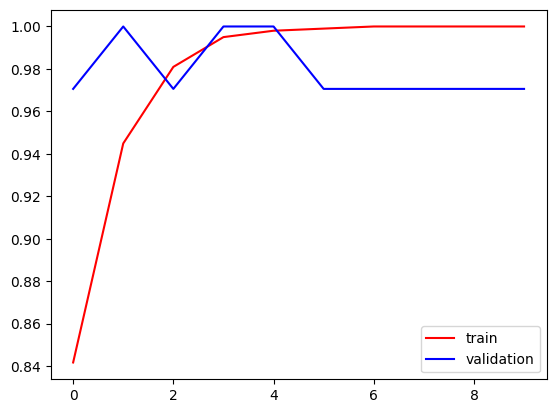

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color= 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color= 'blue', label = 'validation')
plt.legend()
plt.show()

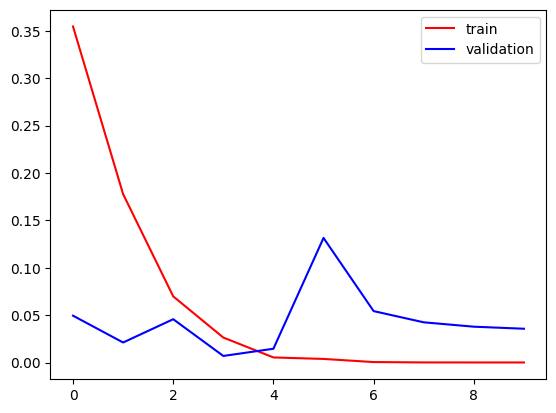

In [12]:
plt.plot(history.history['loss'], color= 'red', label = 'train')
plt.plot(history.history['val_loss'], color= 'blue', label = 'validation')
plt.legend()
plt.show()

In [13]:
model.save("model.h5")

In [14]:
import cv2

In [19]:
test_img = cv2.imread('/content/img1.jpg')

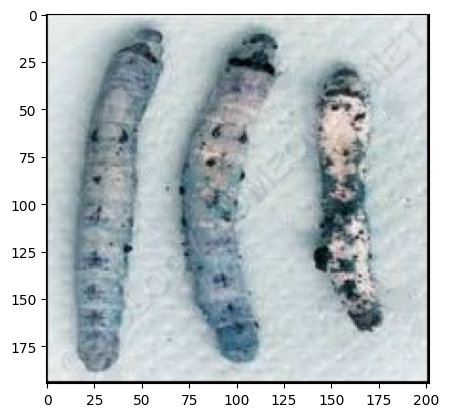

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(195, 202, 3)

In [22]:
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))

In [23]:
prediction = model.predict(test_input)
predicted_class = (prediction > 0.5).astype(int)[0][0]

if predicted_class == 1:
  print("Healthy")
else:
  print("Diseased")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
Diseased
